## Guidence for the data

    Breed: The name of the dog breed.
    type: The category or group the breed belongs to, such as terrier, sporting, working, or non-sporting.
    score: A subjective score assigned to the breed based on an unspecified rating system.
    popularity ranking: The popularity rank of the breed.
    size: The size category of the breed, typically measured on a scale (1 for small, 2 for medium, etc.).
    intelligence: The intelligence level of the breed, categorized as Brightest, Above average, Excellent, Average, etc.
    congenital ailments: Common genetic health issues associated with the breed.
    score for kids: A rating indicating how suitable the breed is for families with children. Higher scores suggest greater suitability. Intelligence + longevity + ailments + cost scores (50% each) + 100% grooming score. highest possible score: 5
    $LIFETIME COST: The estimated lifetime cost of owning the breed, expressed in dollars.
    INTELLIGENCE RANK: The intelligence rank of the breed
    INTELLIGENCE %: The intelligence level of the breed, expressed as a percentage.
    LONGEVITY (YEARS): The average lifespan of the breed, expressed in years.
    NUMBER OF GENETIC AILMENTS: The number of common genetic health issues the breed is prone to.
    GENETIC AILMENTS: The specific genetic health issues associated with the breed.
    PURCHASE PRICE: The average purchase price of the breed, expressed in US dollars.
    FOOD COSTS PER YEAR: The estimated annual cost of feeding the breed.
    GROOMING FREQUENCY: How often the breed requires grooming, typically measured in frequency (daily, once a week, once in a few weeks).
    SUITABILITY FOR CHILDREN: The suitability of the breed for families with children, typically measured on a scale (1 = high suitability, 2= medium suitability, 3= low suitability).

## Packeges

### A csomagok feladata:
<ul>
    <li>ggplot a ábrákhoz,diagramokhoz</li>
    <li>corrplot a korrelációk kereséséhez</li>
    <li>shiny egy interaktív adatelemzőt tesz lehetővé</li>
    <li>gridExtra a ggplotok egymásmellé rakásához</li>
</ul>

In [71]:
install.packages(c("ggplot2", "dplyr", "shiny", "corrplot", "gridExtra"))

Warning message:
"packages 'ggplot2', 'dplyr', 'shiny', 'corrplot', 'gridExtra' are in use and will not be installed"


In [72]:
library(ggplot2)
library(dplyr)
library(shiny)
library(corrplot)
library(gridExtra)

## Data loading

In [73]:
dogData <- read.csv("dogs-ranking-dataset.csv")

In [74]:
head(dogData)

,Breed,type,score,popularity.ranking,size,intelligence,congential.ailments,score.for.kids,size.1,X.LIFETIME.COST,INTELLIGENCE.RANK,INTELLIGENCE..,LONGEVITY.YEARS.,NUMBER.OF.GENETIC.AILMENTS,GENETIC.AILMENTS,PURCHASE.PRICE,FOOD.COSTS.PER.YEAR,GROOMING.FREQUNCY,SUITABILITY.FOR.CHILDREN
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
2,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
3,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
4,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
5,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1
6,Cocker Spaniel,sporting,3.30,27,1,Excellent,"eye, skin problems",4.67,small,"$24,330",20,79%,12.50,2,"eye, skin problems",$465,$674,Once a week,1


## Data prep

Itt átalakítok amit csak tudok számszerűvé, és elhagyom a fölösleges oszlopokat.

In [75]:
dogData$INTELLIGENCE.. <- gsub("%","",dogData$INTELLIGENCE..)

In [76]:
dogData$INTELLIGENCE.. <- as.double(dogData$INTELLIGENCE..)

In [77]:
dogData$INTELLIGENCE.. <- dogData$INTELLIGENCE.. / 100

In [78]:
dogData$X.LIFETIME.COST <- as.integer(gsub( ",", "", gsub("\\$", "", dogData$X.LIFETIME.COST)))

In [79]:
dogData$PURCHASE.PRICE <- as.integer(gsub( ",", "", gsub("\\$", "", dogData$PURCHASE.PRICE)))

In [80]:
dogData$FOOD.COSTS.PER.YEAR <- as.integer(gsub( ",", "", gsub("\\$", "", dogData$FOOD.COSTS.PER.YEAR)))

In [81]:
head(dogData)

,Breed,type,score,popularity.ranking,size,intelligence,congential.ailments,score.for.kids,size.1,X.LIFETIME.COST,INTELLIGENCE.RANK,INTELLIGENCE..,LONGEVITY.YEARS.,NUMBER.OF.GENETIC.AILMENTS,GENETIC.AILMENTS,PURCHASE.PRICE,FOOD.COSTS.PER.YEAR,GROOMING.FREQUNCY,SUITABILITY.FOR.CHILDREN
,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<chr>,<int>
1,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,22638,30,0.70,14.00,0,none,833,324,Once a week,1
2,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,21992,35,0.61,13.84,2,"'lion jaw', heart problems",435,324,Once a week,1
3,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,22049,45,0.45,12.58,0,none,650,466,Once in a few weeks,1
4,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,20224,31,0.69,12.49,1,hip problems,750,324,Once a week,1
5,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,18993,18,0.82,11.66,0,none,800,324,Once a week,1
6,Cocker Spaniel,sporting,3.30,27,1,Excellent,"eye, skin problems",4.67,small,24330,20,0.79,12.50,2,"eye, skin problems",465,674,Once a week,1


## Correlation

A számosítható adatokon korrelációs vizsgálatott végeztem, hogy könnyebb legyen megállapítanom, hogy mit érdemes vizsgálni.

In [82]:
numeric_cols <- sapply(dogData, is.numeric)
cor_matrix <- cor(dogData[, numeric_cols])

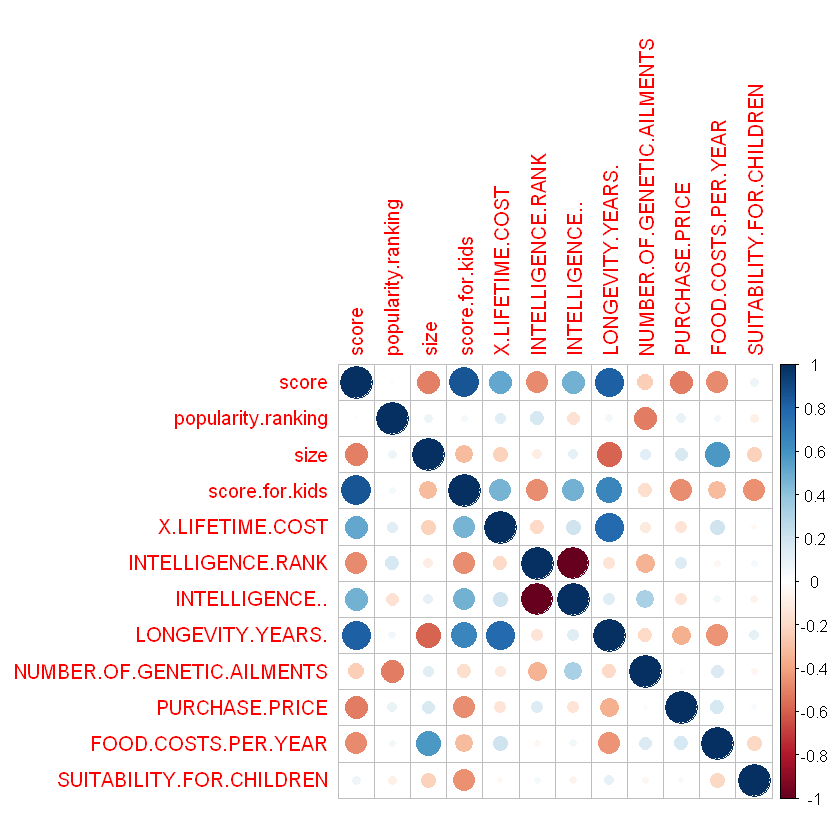

In [83]:
corrplot(cor_matrix, method = "circle")

### Vizsgálatot segítő eszköz

Az alábbi kód létrehoz egy interaktív weboldalt, ahol ponthalmazokat meglehet jeleníteni és így gyorsan és könnyedén vizsgálni az adatokat, ami után eldönthető, hogy mit érdemes kirészleteni.

In [84]:
ui <- fluidPage(
  titlePanel("Dog Data Explorer"),
  sidebarLayout(
    sidebarPanel(
      selectInput("xvar", "X-axis variable", choices = names(dogData)),
      selectInput("yvar", "Y-axis variable", choices = names(dogData)),
      selectInput("colorvar", "Color by variable", choices = names(dogData))
    ),
    mainPanel(
      plotOutput("scatterPlot"),
      plotOutput("corrPlot")
    )
  )
)

server <- function(input, output) {
  output$scatterPlot <- renderPlot({
    ggplot(dogData, aes_string(x = input$xvar, y = input$yvar, color = input$colorvar)) +
      geom_point() +
      labs(title = paste(input$xvar, "vs", input$yvar),
           x = input$xvar,
           y = input$yvar)
  })

  output$corrPlot <- renderPlot({
    corrplot(cor_matrix, method = "circle")
  })
}

#shinyApp(ui = ui, server = server)

## Kimutatások

### Életkorral és árral kapcsolatos megfigyelés

In [85]:
longevityCost <- ggplot(dogData, aes(x = LONGEVITY.YEARS., y = X.LIFETIME.COST, color = FOOD.COSTS.PER.YEAR)) +
  geom_point() +
  geom_smooth(method = 'lm', formula=y ~ x, color = "red") +
  labs(
    title = "Longevity vs Lifetime Cost",
    x = "Longevity in Years",
    y = "Lifetime Cost in Dollars"
  ) +
  theme_minimal()

In [86]:
sizeLongevity <- ggplot(dogData, aes(x = factor(size) , y =  LONGEVITY.YEARS.)) +
  geom_point() +
  geom_boxplot(fill = "lightgreen") +
  labs(
    title = "Dog size vs Longevity",
    x = "Dog size (1=small, 2=medium...)",
    y = "Longevity"
  ) +
  theme_minimal()

In [87]:
longevityHistogram <- ggplot(dogData, aes(LONGEVITY.YEARS.)) +
  geom_histogram(binwidth = 1, color = "black", fill = "lightblue") +
  geom_vline(aes(xintercept=mean(LONGEVITY.YEARS.)), color="blue", linetype="dashed") +
  labs(title = "Dog Longevity Histogram",
       x = "Age at Death",
       y = "Frequency") +
  theme_minimal()

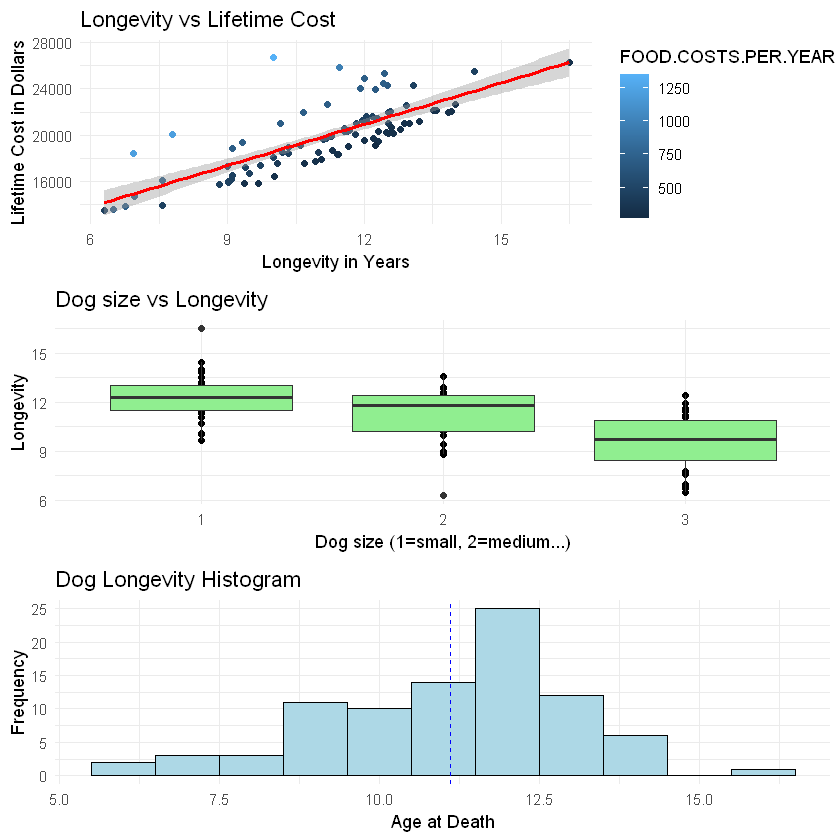

In [88]:
grid.arrange(longevityCost, sizeLongevity, longevityHistogram, ncol = 1)

Itt leolvasható az ábráról, hogy ténylegesen megfigyelhető egy korreláció az élethossz és a kutyára költendő pénz (kicsit egyértelmű is). De az igazán érdekes hogy ezt nem feltétlenül a rendszeres kiadások (étel) miatt történik. Feltételezem hogy nagyobb szerepe van itt az alkalmankénti Orvosi díjnak.
<p>
Továbbá az is leolvasható hogy a kisebb ebek tovább élnek, mint a nagyobbak és hogy az átlag életkor 10-12.5 között található.

In [131]:
typePrice <- ggplot(dogData, aes(x = PURCHASE.PRICE, fill = type)) +
  geom_density(alpha = 0.5) +
  geom_vline(aes(xintercept=mean(PURCHASE.PRICE)), color="blue", linetype="dashed") +
  labs(title = "Distribution of Purchase Price by Breed Type",
       x = "Purchase Price ($)",
       y = "Density") +
  theme_minimal()

In [132]:
typeScore <- ggplot(dogData, aes(x = type , y =  score)) +
  geom_boxplot(fill = "lightblue") +
  geom_point(aes(size = PURCHASE.PRICE), color = 'red', alpha=0.5) +
  scale_size_continuous(range = c(0.2,15))+
  theme_minimal()

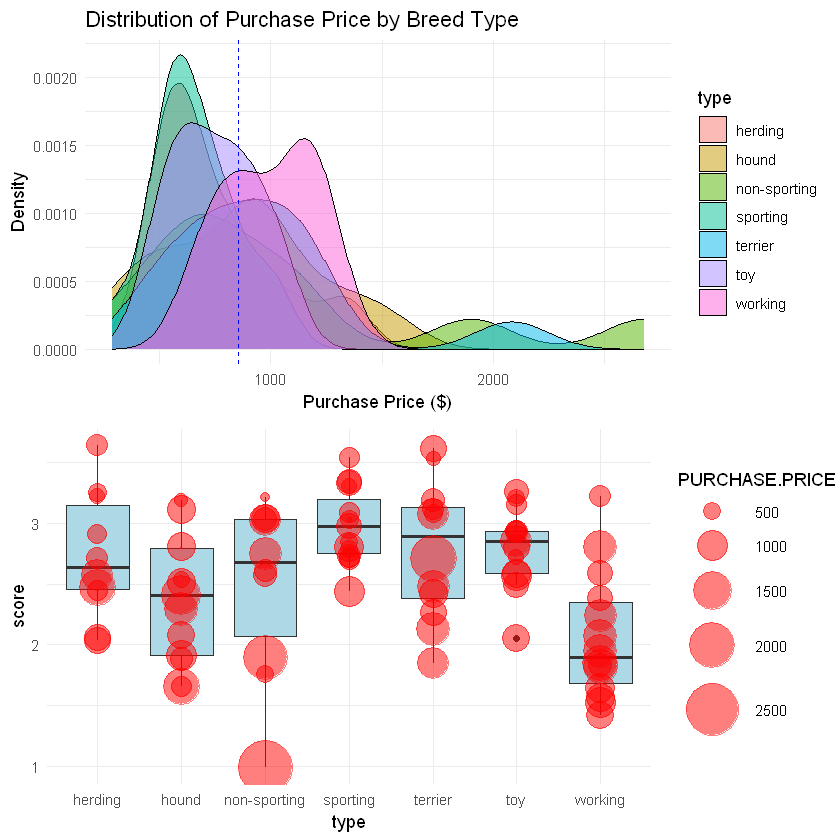

In [134]:
grid.arrange(typePrice, typeScore, ncol = 1)

In [99]:
mean(dogData$PURCHASE.PRICE)

[1] 853.5402

Továbbá megfigyelhető a kutyák áránál, hogy a többség 1000$ alatt van, és hogy a legdrágább kutyák a terrier és a non-sporting. 
<p>
Az is megfigyelhető, hogy a kutya tipusa képes befolyásolni az értékelést, hisz hiába van nagy ár intervallum mégis a working kutyáknak a score-ja lennt van. Ez a nagy ár intervallum a terruernél is hasonló, csak ott egyszerűen nagyobb az score.

### A Score

A dataset készítője nem adot valami sok infót, hogy ez valójában hogyan is lett számolva azon kívűl, hogy "meghatározatlan minősítési rendszer". Emiatt mi most megvizsgáljuk, hogy kiderüljön valójábaban mi is volt itt egy döntő faktor.

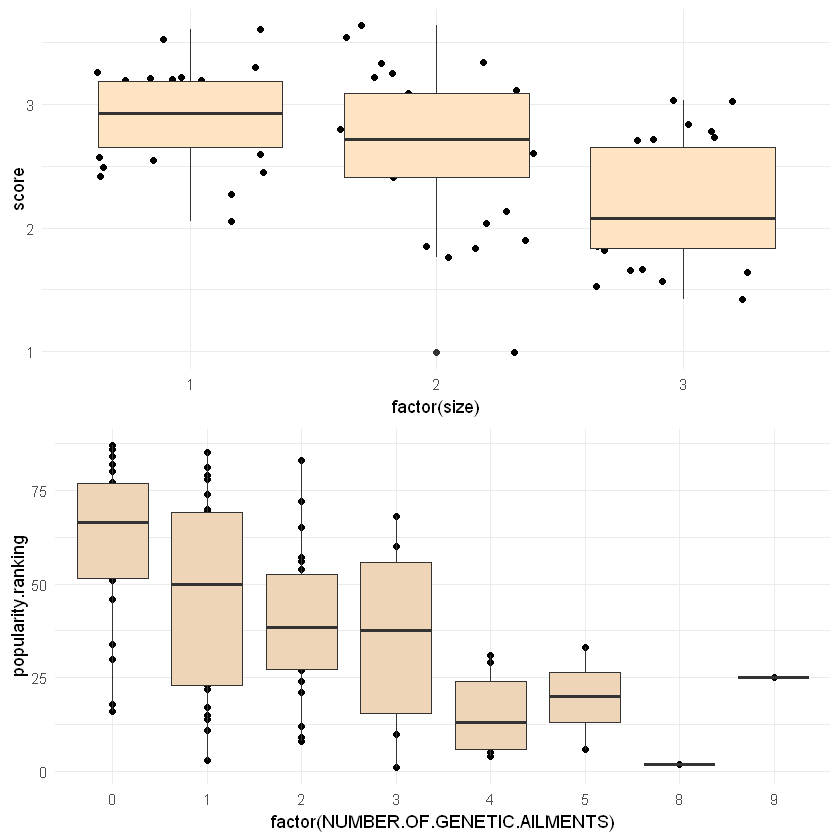

In [142]:
sizeScore <- ggplot(dogData, aes(x = factor(size) , y =  score)) +
  geom_point(position = "jitter") +
  geom_boxplot(fill = "bisque") +
  theme_minimal()
gr <- ggplot(dogData, aes(x = factor(NUMBER.OF.GENETIC.AILMENTS) , y =  popularity.ranking)) +
  geom_point() +
  geom_boxplot(fill = "bisque2")+
  theme_minimal()
grid.arrange(sizeScore, gr, ncol = 1)

Itt az látszódik, hogy a kiskutyákat jobban szeretik, bár ez lehet amiatt is hisz megállapítottuk, hogy a kis kutyák és az éléthossz között korreláció van, tehát lehetséges, hogy valójában csak az viszi föl. Továbbá erős romlás látható a popularity-ben, ha több mint 3 genetikai hibája van egy kutyának.

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_text()`)."


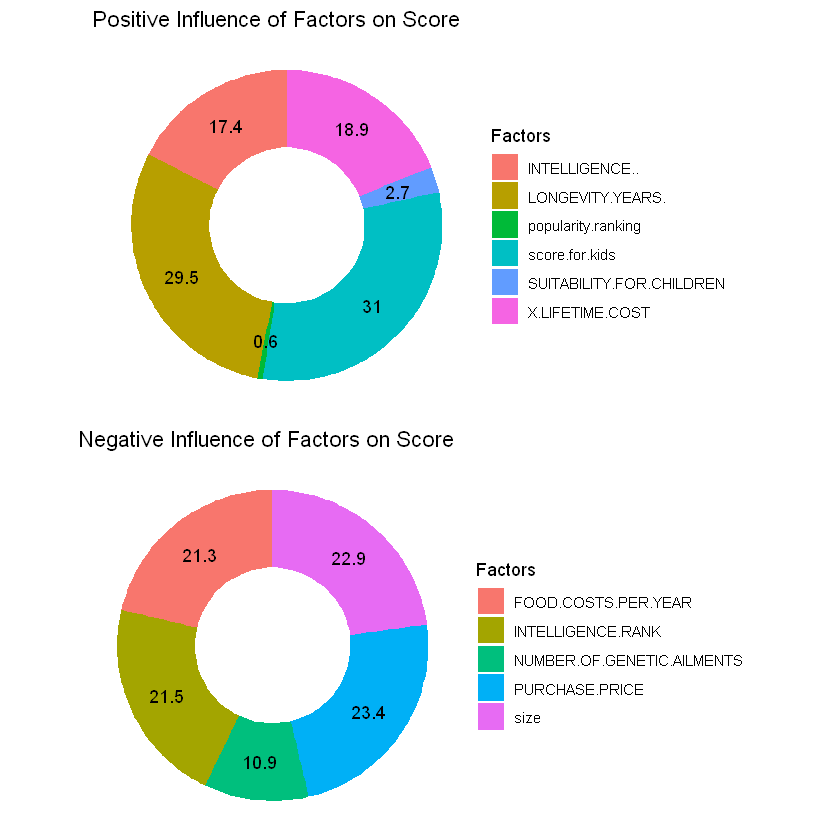

In [90]:
# Calculate correlations with the score
numeric_columns <- sapply(dogData, is.numeric)
correlations <- cor(dogData[, numeric_columns], use = "complete.obs")
score_correlations <- correlations[, "score"]

# Create a data frame for the correlations
cor_df <- data.frame(
  factor = names(score_correlations),
  correlation = score_correlations
)

# Remove the 'score' itself from the data frame
cor_df <- cor_df %>% filter(factor != "score")

# Separate positive and negative correlations
positive_cor_df <- cor_df %>% filter(correlation > 0)
negative_cor_df <- cor_df %>% filter(correlation < 0)

# Normalize the correlations to sum to 100%
positive_cor_df <- positive_cor_df %>%
  mutate(proportion = correlation / sum(correlation) * 100)

negative_cor_df <- negative_cor_df %>%
  mutate(proportion = abs(correlation) / sum(abs(correlation)) * 100)

# Function to create a doughnut chart
create_doughnut_chart <- function(data, title) {
  ggplot(data, aes(x = 2, y = proportion, fill = factor)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    geom_text(aes(label = round(proportion, 1)), position = position_stack(vjust = 0.5)) +
    xlim(0.5, 2.5) +
    theme_void() +
    theme(legend.position = "right") +
    labs(title = title, fill = "Factors") +
    annotate("text", x = 0, y = 0, label = "")
}

# Create the doughnut charts
positive_doughnut <- create_doughnut_chart(positive_cor_df, "Positive Influence of Factors on Score")
negative_doughnut <- create_doughnut_chart(negative_cor_df, "Negative Influence of Factors on Score")

# Display the plots in a Jupyter notebook
grid.arrange(positive_doughnut, negative_doughnut, ncol = 1)

Itt utolsó ábránkban meg is kapjuk a (igaz egy felületes) válaszunkat arra, hogy milyen komponensek mennyire befolyásolják a score-t a különböző adatok.